In [1]:
import sqlite3 as sql
import datetime
from datetime import timedelta
import random
conn= sql.connect("saveData.db")
cur = conn.cursor()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interact
from ipywidgets import widgets
from IPython.display import display

currentDateTime = datetime.date.today().strftime("%A %d-%B-%y")

# Guide and Help

In [24]:
#qry="create table if not exists IncomeData(Transaction_id INTEGER PRIMARY KEY AUTOINCREMENT, Amount float64, Source varchar2, Description varchar2, Balance float64, Date datetime)"
#qry="create table if not exists ExpendData(Record_id INTEGER PRIMARY KEY AUTOINCREMENT, DeductedAmount float64, Source varchar2, Description varchar2, CurrentBalance float64, Date datetime)"
#qry="create table if not exists UserData(Username varchar2, Passcode varchar2)"

#To know all tables in database
#sql_query = """SELECT name FROM sqlite_master  WHERE type='table';"""
#dqry="delete from IncomeData;"
#print(cur.execute(sql_query).fetchall())
#cur.execute(qry)

#x = cur.execute("SELECT * FROM ExpendData where Source = 'outeating' ORDER BY strftime('%Y-%m-%d', Date) DESC;").fetchall()
#cur.execute("Update UserData SET ExpenseTable = CAST(ExpenseTable as varchar2")
#cur.execute("Alter table UserData add column ExpenseTable varchar2")
#cur.execute("Insert into data(Balance) values(100)")
#cur.execute("Alter table ExpendData RENAME COLUMN BalanceTillNow to CurrentBalance")
#cur.execute("Update UserData SET Passcode = ? where Username = 'mddanishsamir635@gmail.com'",(t,))
#for i in cur.execute("Pragma table_info(UserData)"):
    #print(i)

In [13]:
# Function to send OTP via email
from email.mime.text import MIMEText
import smtplib
def send_otp_email(email, otp):
    from_email = "vilen.9996@gmail.com"
    password = "pcjgtsrbxwhbnleu"
    
    msg = MIMEText(f"Your OTP for Email verification: {otp}")
    msg['Subject'] = 'OTP for into Expense Manager'
    msg['From'] = from_email
    msg['To'] = email

    try:
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(from_email, password)
        server.sendmail(from_email, email, msg.as_string())
        server.quit()
        print("OTP sent successfully.")
    except Exception as e:
        print(f"Failed to send OTP. Error: {e}")

In [14]:
send_otp_email('mddanishsamir2002@gmail.com', 4321)

Failed to send OTP. Error: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond


In [ ]:
import random
import smtplib
import getpass
from email.mime.text import MIMEText

# Database to store user data (in-memory dictionary for simplicity)
user_database = {}

# Function to generate a random OTP
def generate_otp():
    return str(random.randint(1000, 9999))


# Function for user signup
def signup():
    email = input("Enter your email: ")
    if email.split('@')[-1] != 'gmail.com':
        print("Invalid username")
        return
    
    if email in user_database:
        print("Email already exists.")
        return
    
    passcode = getpass.getpass("Enter your password: ")
    hashed_passcode = find_hash(passcode)
    
    otp = generate_otp()
    send_otp_email(email, otp)
    
    entered_otp = input("Enter the OTP sent to your email: ")
    
    if entered_otp == otp:
        newtable1 = email.split('@')[0] + ''.join(generate_otp())
        newtable2 = email.split('@')[0] + ''.join(generate_otp())
        user_database[email] = passcode
        # Creating new Database for new User
        qryincm=cur.execute("create table if not exists %s(Transaction_id INTEGER PRIMARY KEY AUTOINCREMENT, Amount float64 NOT NULL, Source varchar2 NOT NULL , Description varchar2, Balance float64 Default 0.0, Date TEXT)" %newtable1)
        qryexpnd=cur.execute("create table if not exists %s(Record_id INTEGER PRIMARY KEY AUTOINCREMENT, DeductedAmount float64 Default 0.0, Source varchar2 NOT NULL, Description varchar2, CurrentBalance float64 Default 0.0, Date TEXT)"%newtable2)
        
        
        # Inserting User details into Database
        cur.execute("Insert into UserData(Username, Passcode, IncomeTable, ExpenseTable) values (?,?,?,?);",(email, hashed_passcode, newtable1, newtable2))
        conn.commit();
        
        print("Signup successful.")
    else:
        print("Signup failed. Incorrect OTP.")

# Function for user sign-in
def signin():
    email = input("Enter your email: ")
    if email.split('@')[-1] != 'gmail.com':
        print("Invalid e-mail")
        return
    password = getpass.getpass("Enter your password: ")
    hashed_password = find_hash(password)
    
    
    userList = cur.execute("select * from UserData where Username = ? " , (email,)).fetchone()
            
    if userList and userList[1] == hashed_password:
        print("\n Welcome! How may i help you?")
        print("""\nEnter 1 to check savings
Enter 2 to add Money
Enter 3 to add spendings
Enter 4 to Monthly Expenses
Enter 5 to show trends in Incomes and expenses
Enter 6 to show category wise expenses
Enter 7 to show entire records
Enter 0 to Log Out!""")
        validRequest = [0,1,2,3,4,5]
        incomeTable = userList[2]
        expenseTable = userList[3]
        
        while True:
            print('\n')
            request = int(input("Enter your request: "))
            print('\n')
            if request == 1:
                checkBalance(expenseTable)
            
            elif request == 2:
                source = input("Enter source only from {'Salary', 'Recovery','Rewards'}")
                date = input("Enter date (Valid format: Monday 12-January-23): ")
                
                if date and source:
                    addMoney(date, source, incomeTable, expenseTable)
                
                else:
                    print("Please select all required field")
                    
            
            elif request == 3:
                '''date = widgets.Dropdown(options=['Today','Tomorrow', 'Yesterday', 'Custom Date'], description = "Select Date")
                thistype = widgets.Dropdown(options=["Select", 'education', 'Room rent', 'self', 'other', 'recharges', 'outeating', 'household', 'LendedMoney', 'donate'], description = "Type")
                display(date, thistype)'''
                
                date = input("Enter date {Valid format: Monday 12-January-23}: ")
                valid_source = ['education', 'Room rent', 'self', 'other', 'recharges', 'outeating', 'household', 'LendedMoney', 'donate']
                source = input("Enter Valid source from ['education', 'Room rent', 'self', 'other', 'recharges', 'outeating', 'household', 'LendedMoney', 'donate']: ")
                
                #path = input("Enter path of document with extension else type 'No Document'.")
                #x = convertToBinaryData(path)
                
                if date and source in valid_source:
                    addExpense(date, source, expenseTable)
                else:
                    print("Please select all required field")
            
            elif request == 4:
                monthlyData(expenseTable)
            
            elif request == 5:
                temp = input("Enter duration for which record is required(months or whole year): ")
                yr = input("Enter year for which record is required")
                incomeSalary(temp, yr, incomeTable, expenseTable)
                
            elif request == 6:
                expenseAnalyz(expenseTable)
            
            elif request == 7:
                temp = input("Enter the Record type (Like Income or Expense): ")
                temp = temp.upper()
                if temp == 'EXPENSE':
                    getXexpenditure(expenseTable)
                elif temp == 'INCOME':
                    getXexpenditure(incomeTable)
                else:
                    print("Enter valid database")
            
            elif request == 0:
                break
            
            else:
                print("Enter Valid Request",'\n')
             
        
    else:
        print("Username or Password is incorrect")
        print("New User please Sign Up")
    

# Main program
print("\n1. Signup")
print("2. Signin")
print("3. Forget Password")
print("0. Quit")
while True:
    
    choice = input("Enter your choice (1/2/3/0): ")
    
    if choice == '1':
        signup()
    elif choice == '2':
        signin()
    elif choice == '3':
        forget()
    elif choice == '0':
        print("Thank You! Have a nice day ahead.")
        break
    else:
        print("Invalid choice. Please try again.")


In [1]:
import json
from datetime import datetime

# Sample JSON data with date strings
json_data = '''
{
    "event": "Meeting",
    "date": "2024-03-26T14:30:00Z"
}
'''

# Load JSON data
data = json.loads(json_data)

# Convert date string to user-readable format
date_str = data['date']
parsed_date = datetime.fromisoformat(date_str[:-1])  # Removing 'Z' and then parsing
user_readable_date = parsed_date.strftime("%Y-%m-%d %H:%M:%S")  # Format to your liking

# Update JSON data with user-readable date
data['date'] = user_readable_date

# Print updated JSON data
print(json.dumps(data, indent=4))

{
    "event": "Meeting",
    "date": "2024-03-26 14:30:00"
}


In [ ]:
temp = cur.execute("SELECT * from UserData").fetchall()
print(temp)

In [4]:
def forget():
    email = input("Enter registered email: ")
    temp = cur.execute("SELECT EXISTS (SELECT 1 FROM UserData WHERE Username=?);",(email,)).fetchone()
    if temp[0] == 1:
        otp = generate_otp()
        send_otp_email(email, otp)
        
        enter_otp = input("Enter otp sent to your mail: ")
        if enter_otp == otp:
            newPassword = getpass.getpass("Enter new Password: ")
            hashed_newPassword = find_hash(newPassword)
            
            cur.execute("Update UserData Set Passcode = ? where Username = ?", (hashed_newPassword, email,))
            print("Password updated successfully")
            
        else:
            print("Incorrect OTP")
    else:
        print("User Does not Exist!")

In [5]:
import hashlib
def find_hash(data):
    hash_object = hashlib.sha256(data.encode())
    hashed_value = hash_object.hexdigest()
    return hashed_value


In [6]:
def optimal_budget_allocation(budget, categories):
    # Create a table to store optimal values for subproblems
    dp = [[0] * (budget + 1) for _ in range(len(categories) + 1)]

    for i in range(1, len(categories) + 1):
        for j in range(budget + 1):
            cost, satisfaction = categories[i - 1]
            # Choose whether to allocate to the current category or skip it
            if cost <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - cost] + satisfaction)
            else:
                dp[i][j] = dp[i - 1][j]

    # Reconstruct the optimal spending strategy (optional)
    optimal_allocation = []
    i, j = len(categories), budget
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            optimal_allocation.append(categories[i - 1])
            j -= categories[i - 1][0]
        i -= 1

    return dp[len(categories)][budget], optimal_allocation

# Example usage:
budget = 20000
categories = [(500, 50), (5000, 700), (2000, 300)]
max_satisfaction, allocation = optimal_budget_allocation(budget, categories)
print("Max Satisfaction:", max_satisfaction)
print("Optimal Allocation:", allocation)


Max Satisfaction: 1050
Optimal Allocation: [(2000, 300), (5000, 700), (500, 50)]


In [7]:
temp = cur.execute("SELECT strftime('%d-%m-%Y', 'now', '0 day');").fetchone()
#cur.execute("insert into IncomeData (Amount, Balance, Source, Description, Date) select AddedAmount, Balance, ExpendType, Purpose, Date from data where AddedAmount <> 'None'")
#conn.commit();
'''temp = cur.execute("""SELECT 
    strftime('%d', '2035-12-01') AS "Day",
    strftime('%m', '2035-12-01') AS "Month",
    strftime('%Y', '2035-12-01') AS "Year";""").fetchall()'''
print(temp)

('26-03-2024',)


In [8]:
def checkBalance(table):
    print(table)
    cur.execute("select CurrentBalance from %s " %table)
    x=cur.fetchall()
    if len(x) == 0:
        print("Your Current Saving: ", 0.0)
    else:
        print("Your Current Saving: ",x[-1][0])

In [9]:
def getXexpenditure(table):
    till =input("Enter Number of transactions you want to see: ")
    
    query = "select * from %s " %table
    df = pd.read_sql(query, conn)
    if till.isalpha():
        #print(df.to_string())
        '''with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
            print(df)'''
        from IPython.core.display import HTML
        display(HTML(df.to_html()))
    else:
        display(df.tail(int(till)))
        '''for i in enumerate(x[len(x)- int(till):][::-1], 1):
            print([i])'''

## Deletion of a record

In [10]:
def delete(dates, typeof):
    if dates == 'Yesterday':
        thisdate = (datetime.date.today() - timedelta(1)).strftime("%A %d-%B-%y")
    if dates == 'Custom Date':
        thisdate = input('Please Enter the Date here...Note* : Months and days 1st letter must be Capital:  ')
    if dates == 'Today':
        thisdate = datetime.date.today().strftime("%A %d-%B-%y")
    query = " delete from IncomeData where Date = (?) and Transaction_id = 21;"
    cur.execute(query, (thisdate, ))
    conn.commit()
    print("done")

In [11]:
Deletedate = widgets.Dropdown(options=['Today', 'Yesterday', 'Custom Date'], description = "Select Date")
deletetype = widgets.Dropdown(options=["Select", 'education', 'Room rent', 'self', 'other', 'recharges', 'outeating', 'household', 'LendedMoney', 'donate', 'Salary', 'Recovery','Rewards'], description = "Type")
display(Deletedate, deletetype)

Dropdown(description='Select Date', options=('Today', 'Yesterday', 'Custom Date'), value='Today')

Dropdown(description='Type', options=('Select', 'education', 'Room rent', 'self', 'other', 'recharges', 'outea…

In [ ]:
delete(Deletedate.value, deletetype.value)

In [ ]:
## UPDATION OF RECORDS

In [ ]:
def Update(column, date, thistype, olderValue, write_this):
    if date == 'Yesterday':
        thisdate = (datetime.date.today() - timedelta(1)).strftime("%A %d-%B-%y")
    if date == 'Custom Date':
        thisdate = input('Please Enter the Date here...Note* : Months and days 1st letter must be Capital:  ')
    if date == 'Today':
        thisdate = datetime.date.today().strftime("%A %d-%B-%y")
    query = " update data set %s  = ? where Date = ? and %s = ?" %(column, column)
    cur.execute(query, (write_this,thisdate,olderValue,))
    conn.commit()
    print("Record Updated!")

In [ ]:
table = "ExpendData"
monthis = "September"
#temp  ="Delete from %s where Record_id = 79" %table
temp1 = "Select * from %s where Date like ?" %table
x = cur.execute(temp1, (f'%{monthis}%',)).fetchall()
#cur.execute(temp)
#conn.commit();
print(x)

In [ ]:
date = widgets.Dropdown(options=['Today', 'Yesterday', 'Custom Date'], description = "Select Date")
thistype = widgets.Dropdown(options=["Select", 'education', 'Room rent', 'self', 'other', 'recharges', 'outeating', 'household', 'LendedMoney', 'donate', 'Salary', 'Recovery','Rewards'], description = "Type")
column = widgets.Dropdown(options= ['SNo','Balance', 'Expenditure','ExpendType','Purpose','Date','AddedAmount'], description = "select column to be updated")
olderValue = input("Enter Current statement in the record: ")
write_this  = input("Enter the new statement to be rewritten: ")

display(column, date, thistype)

In [ ]:
Update(column.value, date.value, thistype.value, olderValue, write_this)

In [ ]:
#import base64
def convertToBinaryData(docfile):
    #convert digital data to binary format
    with open(docfile, 'rb') as file:
        binaryData = file.read()
        #base64_encoded = base64.b64encode(binaryData).decode('utf-8')
    return binaryData

In [36]:
def addExpense(dates, types, table2):
        
    amount = float(input("Enter the amount you spent: "))
    
    while True:
        if amount< 0:
            print("  Please Enter Valid Amount!")
            amount = int(input('Enter the Amount you spent: '))
        if amount > 0:
            break
            
    z = input("What was the purpose of this expenditure: ")
        
    currBalance = cur.execute("select CurrentBalance from %s" %table2).fetchall()
    if len(currBalance) != 0:
        temp=currBalance[-1][0]
    else:
        temp = 0
        
    remain= temp-amount
    query = "insert into %s (CurrentBalance, DeductedAmount, Source, Description, Date) values (?, ?, ?, ?, ?);" %table2
    cur.execute(query, (remain, amount, types, z, dates))
    conn.commit();
    print("Your remaining amount is ", remain)

In [ ]:
date = widgets.Dropdown(options=['Today','Tomorrow', 'Yesterday', 'Custom Date'], description = "Select Date")
thistype = widgets.Dropdown(options=["Select", 'education', 'Room rent', 'self', 'other', 'recharges', 'outeating', 'household', 'LendedMoney', 'donate'], description = "Type")
display(date, thistype)

In [ ]:
path = 'I:\TCSPapers.pdf'
x = convertToBinaryData(path)
addExpense(date.value, thistype.value, x)

In [ ]:
# To show the added document
from io import BytesIO
from PIL import Image
x = cur.execute("select Document from ExpendData").fetchall()
a = x[-2][-1]
image = Image.open(BytesIO(a))
image.show()

In [ ]:
# To show pdf file
import tempfile
#import PyPDF2
import subprocess

x = cur.execute("select Document from ExpendData").fetchall()
a = x[-2][-1]

temp_pdf = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf")

with open(temp_pdf.name, 'wb') as temp_file:
    temp_file.write(a)

subprocess.Popen(['start', '', temp_pdf.name], shell = True)
temp_pdf.close()
#import os
#os.startfile(temp_pdf_file.name)

In [37]:
def addMoney(dates, source, table1, table2):
    '''if dates == 'Yesterday':
        #thisdate = datetime.date.today() - timedelta(days=1)
        #thisdate.strftime("%A %d-%B-%y")
        thisdate = (datetime.date.today() - timedelta(1)).strftime("%A %d-%B-%y")
    if dates == 'Custom Date':
        #thisdate = widgets.Textarea(value="Please enter Date here..")
        thisdate = input('Please Enter the Date here...Note* : Months and days 1st letter must be Capital:  ')
    if dates == 'Today':
        thisdate = datetime.date.today().strftime("%A %d-%B-%y")'''
    
    num = int(input('Enter the Amount to be Added: '))
    while True:
        if num< 0:
            print("  Please Enter Valid Amount!")
            num = int(input('Enter the Amount to be Added: '))
        if num > 0:
            break
    purps = input("What was the purpose of this expenditure: ")
    currBalance = cur.execute("select CurrentBalance from %s" %table2).fetchall()
    if len(currBalance) != 0:
        temp=currBalance[-1][0]
    else:
        temp = 0
        
    mainBal= temp + num
    
    query1 = "insert into %s (Balance, Amount, Source, Description, Date) values (?, ?, ?, ?, ?);" %table1
    query2 = "insert into %s (CurrentBalance, Source, Description, Date) values (?, 'BalanceUpdate', 'Updation in IncomeData', ?);" %table2
    cur.execute(query1, (mainBal, num, source, purps, dates))
    cur.execute(query2, (mainBal, dates))
    print("Amount Successfully added")
    conn.commit();

In [ ]:
date = widgets.Dropdown(options=['Today', 'Yesterday', 'Custom Date'], description = "Select Date")
thistype = widgets.Dropdown(options=["Select", 'Salary', 'Recovery','Rewards'], description = "Type")
display(date, thistype)

In [ ]:
addMoney(date.value, thistype.value)

In [ ]:
temp = '08-April-23'
l = 'now'
#x = cur.execute("SELECT strftime('%y','now') - strftime('%y','2014');").fetchall()
#x = cur.execute("Select Cast ((JulianDay(ToDate) - JulianDay(Date)) As Integer)").fetchall()
x = cur.execute("SELECT strftime('%s', 'now');").fetchall()
#x = cur.execute(" select Expenditure from data where strftime('%y', Date) IN ('23', '22');").fetchall()
'''temps = '-4'
t = '1 days'
query = "SELECT DATE('now', '%s year', ?) AS modified_date;" %temps
y = cur.execute(query, (t,)).fetchall()'''
#x.strftime("%A %d-%B-%y")
print(x)

#SELECT DATE('now','-1 day')
#SELECT DATE('now', '-5 months', '-3 days')
#SELECT DATE('now', '+1 day')

#(datetime.date.today() - timedelta(1)).strftime('%Y-%m-%d')
yesterday = datetime.date.today() - timedelta(days=1)
yesterday.strftime("%A %d-%B-%y")

In [42]:
s = "saturday 01 april 23"
# capitalize first letter of each word
new_s = " ".join(word[0].upper()+word[1:] for word in s.split(" "))
print(new_s)

Saturday 01 April 23


# Analysis

In [78]:
### Month wise Data
def monthlyData(temp2):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    monthlyExpenses = []
    for monthis in months:
        query = "Select sum(DeductedAmount) from %s where Date like ?" %temp2 
        temp = cur.execute(query, (f'%{monthis}%',)).fetchall()
        if temp[0][0] == None:
            monthlyExpenses.append(0)

        else:
            monthlyExpenses.append(temp[0][0])
    
    # Plotting using Matplotlib
    fig = plt.figure(figsize = (12, 6))
    plt.bar(months, monthlyExpenses, color ='maroon', width = 0.6)
    plt.xlabel("Months", fontweight ='bold', fontsize = 15)
    plt.ylabel("Total Expenses", fontweight ='bold', fontsize = 15)
    plt.title("Monthly Expenses FY23",fontweight ='bold', fontsize = 15)

    # Show the plot
    plt.show()
    
    print("Total Expense FY23 is", sum(monthlyExpenses))

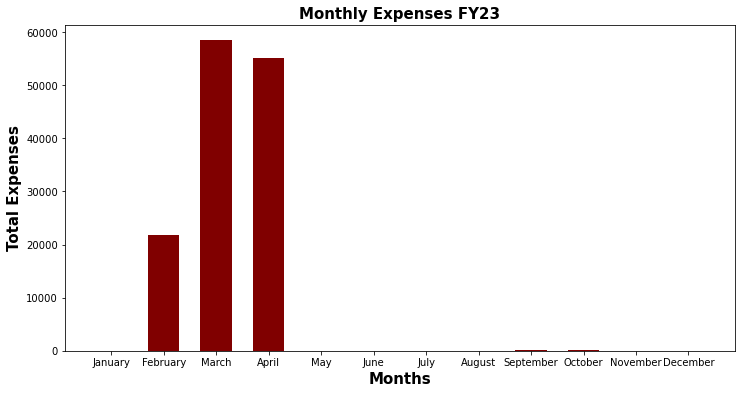

Total Expense FY23 is 135707.0


In [79]:
monthlyData('ExpendData')

In [93]:
import numpy as np
def incomeSalary(mnth, yr, table1, table2):
    if mnth.upper() != 'WHOLE YEAR':
        dic = {'february': 28, 'april': 30, 'june':30, 'september':30, 'november':30}
        days = []
        if mnth in dic:
            for x in range(1,dic[mnth]+1):
                if x < 10:
                    days.append(' 0'+str(x))
                else:
                    days.append(' '+str(x))
        else:
            for x in range(1, 32):
                if x < 10:
                    days.append(' 0'+str(x))
                else:
                    days.append(' '+str(x))
        
        duration = mnth+'-'+yr
        expns = []
        incme = []
        
        for i in days:
            day = i + '-'+mnth+'-'+yr
            q1  = "Select sum(DeductedAmount) from %s where Date like ? and Source <> 'BalanceUpdate'" %table2
            q2  = "Select sum(Amount) from %s where Date like ?" %table1
            temp1 = cur.execute(q1, (f'%{day}',)).fetchone()
            temp2 = cur.execute(q2, (f'%{day}',)).fetchone()
            if temp1[0] == None:
                expns.append(0)

            else:
                expns.append(temp1[0])
                
            if temp2[0] == None:
                incme.append(0)

            else:
                incme.append(temp2[0])
                
            # Analysis
        fig = plt.subplots(figsize =(17, 7))
        plt.plot(days, incme, 'c', label = 'Incomes')
        plt.plot(days, expns, 'r', label = 'Expenses')
        plt.legend()
        plt.show()
            

    else:
        months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        monthlyExpenses = []
        monthlyIncomes = []
        for i in months:
            duration = i+'-'+yr
            qr1  = "Select sum(DeductedAmount) from %s where Date like ?" %table2
            qr2  = "Select sum(Amount) from %s where Date like ?" %table1
            temp1 = cur.execute(qr1, (f'%{duration}',)).fetchone()
            temp2 = cur.execute(qr2, (f'%{duration}',)).fetchone()
            if temp1[0] == None:
                monthlyExpenses.append(0)

            else:
                monthlyExpenses.append(temp1[0])
                
            if temp2[0] == None:
                monthlyIncomes.append(0)

            else:
                monthlyIncomes.append(temp2[0])
                    
            #Analyzing
        barWidth = 0.3
        fig = plt.subplots(figsize =(14, 7))

        br1 = np.arange(12)
        br2 = [x + barWidth for x in br1]
        br3 = [x + barWidth for x in br2]
            
            
        plt.bar(br1, monthlyIncomes, color ='g', width = barWidth, edgecolor ='grey', label ='Incomes')
        plt.bar(br2, monthlyExpenses, color ='r', width = barWidth, edgecolor ='grey', label ='Expenses')
                
        plt.xlabel('Months', fontweight ='bold', fontsize = 15)
        plt.ylabel('Amounts', fontweight ='bold', fontsize = 15)
        plt.xticks([r + barWidth for r in range(12)], months)
        plt.title("Expense VS Income Analysis")

            # Show the plot
        plt.legend()
        plt.show()
            
        fig = plt.subplots(figsize =(14, 7))
        plt.plot(months, monthlyIncomes, 'c', label = 'Incomes')
        plt.plot(months, monthlyExpenses, 'r', label = 'Expenses')
        plt.legend()
        plt.show()

                    
    

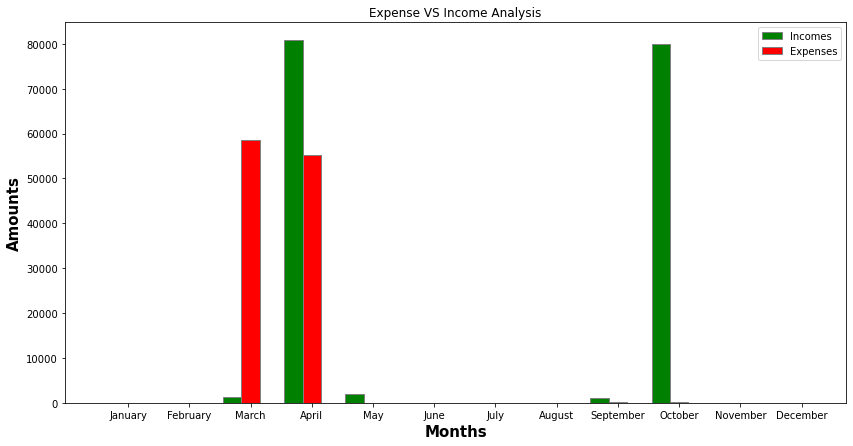

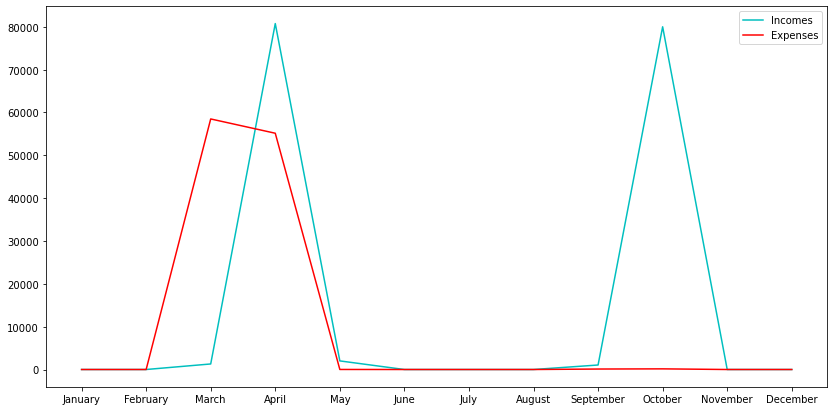

In [98]:
incomeSalary('Whole Year', '23', 'IncomeData', "ExpendData")

In [ ]:
month = widgets.Dropdown(options=['Whole Year', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], description = "Select Month")
year = widgets.Dropdown(options=['22', '23', '24', '25'], description = "Select Year")
display(month, year)

In [ ]:
incomeSalary(month.value, year.value)

In [ ]:
date = widgets.Dropdown(options=["Select One","By Day","By Monthly","By Yearly"],description = "Select Period")
thistype = widgets.Dropdown(options=["Select", 'Salary', 'Recovery','Rewards'], description = "Type")
display(date, thistype)

In [ ]:
#show expenditure vs savings
#show expendtype and its expenditure
#show months with their monthly expenditure

In [201]:
print("Hii, I will show you your records Graphically")

def expenseAnalyz(table2):
    sources = ['EDUCATION', 'SELF', 'OTHERS', 'DEBT', 'RECHARGE', 'OUTEATING', 'HOME REQUIREMENT','LENDED MONEY','ROOM RENT']
    colors = ['green', 'purple', 'yellow', 'red', 'cyan','blue', 'orange', 'black', 'magenta']

    
    @interact
    def compare(month = ['Year', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Exit'], year = ['2023', '2023', '2024']):
        
        expenseList = []
        duration = month+'-'+ year[2:]
        query = "Select sum(DeductedAmount) from %s where Source = ? and Date like ?"%table2
        
        if month == 'Year':
            duration = '-'+year[2:]
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
            
        if month =='January':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
        if month =='February':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
        if month == 'March':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
        if month == 'April':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
        if month == 'May':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
                
        if month == 'June':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
                
        if month == 'July':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
                
        if month == 'August':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
                
        if month == 'September':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
                
        if month == 'October':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
                
        if month == 'November':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
        
        if month == 'December':
            for i in sources:
                temp = cur.execute(query, (i, f'%{duration}',)).fetchone()
                if temp[0] == None:
                    expenseList.append(0)
                    print(i, ': ',0)
                else:
                    expenseList.append(temp[0])
                    print(i, ': ',temp[0])
                
        if month == 'Exit':
            return
        
        print("Total Expense: ",sum(expenseList))
        
        fig = plt.figure(figsize =(10, 7))
        plt.pie(expenseList, labels = sources, colors = colors)

        explode = [0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1]
        
        fig, ax = plt.subplots(figsize =(15, 7))
        wp = { 'linewidth' : 1, 'edgecolor' : "green" }
        wedges, texts, autotexts = ax.pie(expenseList, labels = sources, colors = colors, autopct = "%.2f%%", explode = explode, shadow = True,
               startangle = 90, wedgeprops = wp, textprops = dict(color ="magenta"))
        
        ax.legend(wedges, sources,
        title ="Categories",
        loc ="center left",
        bbox_to_anchor =(2, 0, 0.5, 1))
 
        plt.setp(autotexts, size = 8, weight ="bold")
        ax.set_title("Category-wise Analysis")
        
        plt.show()
        
        

Hii, I will show you your records Graphically


In [202]:
expenseAnalyz('ExpendData')

interactive(children=(Dropdown(description='month', options=('Year', 'January', 'February', 'March', 'April', …

In [86]:
i = '23'
x = cur.execute("Select Source, DeductedAmount from ExpendData where Source = 'DONATE'").fetchall()
print(x)

[]


In [79]:
import cv2
img = cv2.imread('I:\india--map.jpg')
print(img)

ModuleNotFoundError: No module named 'cv2'

In [81]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [14]:
def piechart():
    @interact
    def domain(Domains = ['Select', 'education', 'self', 'donate', 'other', 'Debt', 'recharges', 'outeating', 'household','LendedMoney', 'donate']):
        Query = "select DeductedAmount, Date as Dates from ExpendData where Source = ?"
        if Domains == 'Select':
            print("            Select a Field")
        else:
            print(cur.execute(Query, (Domains,)).fetchall())

In [15]:
piechart()

interactive(children=(Dropdown(description='Domains', options=('Select', 'education', 'self', 'donate', 'other…

In [ ]:
'''figure, axis = plt.subplots(2, 1, figsize=(18,12))
figure.suptitle("Expenditure and Balance or savings")
axis[0].plot(dfsal['Date'], dfsal['Bal'])
axis[0].set_title("Savings VS Date")
axis[1].bar(df['Date'], df['Expenditure'])
axis[1].set_title("Expenditure VS Date")
plt.xticks(rotation=90)
//plt.show()'''

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(18,12))
fig.suptitle("Expenditure and Balance or savings", fontsize=16)
sns.barplot(df['Date'],df['Expenditure'], ax = axes[0])
sns.lineplot(dfsal['Date'],dfsal['Bal'], ax = axes[1])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier()

In [ ]:
query = "select ExpendType, Expenditure from data where Expenditure<> 'None' and ExpendType <> 'salary'"
Data = pd.read_sql(query, conn)
X = Data.iloc[:, :-1].values
y = Data.iloc[:, -1].values
le = LabelEncoder()
X['ExpendType'] = le.fit_transform(X['ExpendType'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
query = "select count(*), strftime('%y-%m', Date), ExpendType, Date from data Group By ExpendType"
q = "select Count(*), strftime(Date, '%m-%Y') as 'month-year' from data Group By strftime(Date, '%m-%Y')"
x = cur.execute(q).fetchall()
for i in x:
    print(i)

ModuleNotFoundError: No module named 'directory'